## **Import Libraries**
___

In [41]:
# Import Analytical Libraries
import pandas as pd
import numpy as np 

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics Libraries
from scipy.stats import kurtosis, skew, shapiro
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import xgboost as xgb

# Misc Libraries
from typing import Optional, Union

## **Read Files**
___

In [42]:
# Read in the HR attrition csv file.
df = pd.read_csv('encoded_attrition.csv', index_col='Unnamed: 0')

# Return all columns when displaying dataframe.
pd.set_option('display.max_columns', None)

# Set the style of the plots
plt.style.use('ggplot')
# Set default colormap for continuous data (both Matplotlib and Seaborn)
plt.rcParams['image.cmap'] = 'rocket'
# Set default palette for categorical data
sns.set_palette('rocket')

## **Dataset Identification**
___

In [43]:
# Return the shape and size of the dataset
print(f'Shape of the dataset: {df.shape}\nSize of the dataset: {df.size}')

Shape of the dataset: (1470, 43)
Size of the dataset: 63210


In [44]:
# Return the axes of the dataset
df.axes

[Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
        ...
        1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469],
       dtype='int64', length=1470),
 Index(['Age', 'AgeBin', 'BusinessTravel', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome', 'IncomeBin', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
        'Department_Research & Development', 'Department_Sales',
        'EducationField_Life Sciences', 'EducationField_Marketing',
        'EducationField_Medical', 'EducationField_Other',
        'EducationField_Technical Degree', 'Gender_Male',
        'JobRole_Human Resources', 'JobRole_Laborat

In [45]:
# Return the datatypes of each feature in the dataset
df.dtypes

Age                                  int64
AgeBin                               int64
BusinessTravel                       int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
IncomeBin                            int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCurrManager                 int64
Attrition_Y

In [46]:
# Reaturn the top 5 rows of the dataset
df.head()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,2,1,1,2,2,3,2,4,5993,1,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,2,2,8,1,3,2,2,2,5130,1,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1,2,2,4,2,1,3,2090,0,6,15,3,2,0,7,3,3,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1,2,3,4,4,3,1,3,2909,0,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,1,1,2,1,1,3,1,2,3468,1,9,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [47]:
# Return the bottom 5 rows of the dataset
df.tail()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1465,36,1,2,23,2,3,4,2,4,2571,0,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,1,1,6,1,4,2,3,1,9991,2,4,15,3,1,1,9,5,3,7,7,1,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,1,1,4,3,2,4,2,2,6142,1,1,20,4,2,1,6,0,3,6,2,0,3,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,2,2,2,3,4,2,2,2,5390,1,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1469,34,1,1,8,3,2,4,2,3,4404,1,2,12,3,1,0,6,3,4,4,3,1,2,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


## **Dataset Preprocessing**
___

##### 1. **Feature Distribution Statistics**

In [48]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the Shapiro-Wilk test. These values help
    evaluate the distribution of the features of the dataframe passed in to the dataframe parameter. 

    Args: pandas.dataframe.
        - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        if dataframe[column].nunique() > 5:
            _skew = skew(dataframe[column])
            _kurtosis = kurtosis(dataframe[column], fisher=True)
            print(
                f"\n{column}\n"
                f"skew: {_skew:.4f}\n"
                f"kurtosis: {_kurtosis:.4f}"
            )

            # Perform Shapiro-Wilk test
            stat, p_value = shapiro(dataframe[column])

            # Print the results
            print(f"Shapiro-Wilk test: {stat:.4f}")
            print(f"P-value: {p_value:.4f}")

            # Interpret the p-value
            alpha = 0.05
            if p_value > alpha:
                print("The data is likely normally distributed (fail to reject H0).")
            else:
                print("The data is not normally distributed (reject H0).")

            # Check the absolute values of each skew value of a feature
            if np.abs(_skew) < 0.5:
                print('distribution is almost symmetrical')
            elif 0.5 <= np.abs(_skew) <= 1:
                print('distribution is modertely skewed')
            else:
                print('distribution is highly skewed')
            
            # Extremity of tail distribution
            if _kurtosis > 0:
                print(
                    f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with higher peakedness '
                    f'and a greater probability of extreme values.\n'
                )
            elif _kurtosis < 0:
                print(
                    f'Platykurtic distribution - lighter tails and a flatter peak than the '
                    f'normal distribution.\n'
                    f'This type of distribution is often associated with less peakedness ' 
                    f'and a lower probability of extreme values.\n'
                )
            else:
                print(
                    f'Mesokurtic distribution - similar peak and tail shape as the normal '
                    f'distribution.\n'
                    )
                

statistics(df)


Age
skew: 0.4129
kurtosis: -0.4069
Shapiro-Wilk test: 0.9774
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


DistanceFromHome
skew: 0.9571
kurtosis: -0.2281
Shapiro-Wilk test: 0.8616
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is modertely skewed
Platykurtic distribution - lighter tails and a flatter peak than the normal distribution.
This type of distribution is often associated with less peakedness and a lower probability of extreme values.


MonthlyIncome
skew: 1.3684
kurtosis: 0.9977
Shapiro-Wilk test: 0.8279
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This

**`DESCRIPTIVE ANALYSIS SUMMARY`**:
 
**Statistics**

| Feature | Skew | Null Hypothesis | Distribution Type | Transformation | Scale Method |
| ------- | ---- | --------------- | ----------------- | -------------- | ------------ |
| Age | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) |
| DistanceFromHome | Moderately Skew +ve | Reject | Platykurtic  | No | Normalization(MinMaxScaler) | 
| MonthlyIncome |highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| NumCompaniesWorked |highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| PercentSalaryHike | +ve Normal | Reject | Platykurtic | No | Normalization(MinMaxScaler) | 
| TotalWorkingYears | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| TrainingTimesLastYear | Moderately Skew +ve | Reject | Leptokurtic  | No | RobustScaler | 
| YearsAtCompany | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsInCurrentRole | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 
| YearsSinceLastPromotion | Highly skewed | Reject | Leptokurtic | Yes | RobustScaler | 
| YearsWithCurrManager | Moderately Skew +ve | Reject | Leptokurtic | No | RobustScaler | 

#### 2. **Duplicated Values**


In [49]:
# Return the total number of duplicate values in the dataset
dupes = df.duplicated().sum()
print(f'Total number of duplicates in the dataset: {dupes}')

Total number of duplicates in the dataset: 0


#### 3. **Null Values**

In [50]:
# Return the total number of null values in the dataset
nulls = np.count_nonzero(df.isnull().values)
print(f'Total number of null values in the dataset: {nulls}')

Total number of null values in the dataset: 0


#### 4. **Outlier Values**

In [51]:
def outlierIQR(column: str, dataframe: Optional[pd.DataFrame]=df) -> None:
    """
    A function that outputs features from the pandas.dataframe object passed in the dataframe 
    parameter that have outlier values, and the total number of outlier values in the feature. 
    The outliers are found using the IQR method. 

    Args:
        column: string.
            - Name of the column that can be found within the pandas.dataframe object passed in the dataframe
            parameter.
        dataframe: pandas.dataframe.
            - A pandas dataframe.

    Returns:
        None
    """
    # Store the quantile values 
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Return the interquartile range
    IQR = q3 - q1

    # Create the upper and lower limits 
    upper_limit = dataframe[column] > q3 + (IQR * 1.5)
    lower_limit = dataframe[column] < q1 - (IQR * 1.5)

    # Return the outliers of the feature
    outliers = dataframe[column][upper_limit | lower_limit]

    if len(outliers) > 0:
        print(f'{column}\nTotal Outliers: {len(outliers)}\n')


for feature in df:
    outlierIQR(feature)

BusinessTravel
Total Outliers: 427

MonthlyIncome
Total Outliers: 114

NumCompaniesWorked
Total Outliers: 52

PerformanceRating
Total Outliers: 226

StockOptionLevel
Total Outliers: 85

TotalWorkingYears
Total Outliers: 63

TrainingTimesLastYear
Total Outliers: 238

YearsAtCompany
Total Outliers: 104

YearsInCurrentRole
Total Outliers: 21

YearsSinceLastPromotion
Total Outliers: 107

YearsWithCurrManager
Total Outliers: 14

Attrition_Yes
Total Outliers: 237

EducationField_Marketing
Total Outliers: 159

EducationField_Other
Total Outliers: 82

EducationField_Technical Degree
Total Outliers: 132

JobRole_Human Resources
Total Outliers: 52

JobRole_Laboratory Technician
Total Outliers: 259

JobRole_Manager
Total Outliers: 102

JobRole_Manufacturing Director
Total Outliers: 145

JobRole_Research Director
Total Outliers: 80

JobRole_Research Scientist
Total Outliers: 292

JobRole_Sales Executive
Total Outliers: 326

JobRole_Sales Representative
Total Outliers: 83



#### 5. **Feature Scaling**

In [52]:
def featureScaling(
        dataframe: pd.DataFrame, column: str, transform_features: list, skewed_features: list
) -> dict[str, np.ndarray]:
    """
    Applies different scaling or transformation techniques to a feature based on its characteristics.

    Args:
        - dataframe (pd.DataFrame): The DataFrame containing the features.
        - column (str): The name of the feature/column to scale or transform.
        - transform_features (list): List of feature names that need a log transformation 
        followed by robust scaling.
        - skewed_features (list): List of feature names that are skewed and require robust 
        scaling.

    Returns:
        - dict: A dictionary with the column name as the key and the scaled or transformed 
        feature values as the value.

    Raises:
    ValueError: If an incorrect column name is provided.
    """
    if column in transform_features:
        # Apply Log transformation
        transform = np.log1p(dataframe[[column]])

        # Instantiate the RobustScaler
        r_scaler = RobustScaler()
        # Fit and transform the feature
        transform_scale = r_scaler.fit_transform(transform)

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in skewed_features:
        # Instantiate the RobustScaler
        r_scaler = RobustScaler()

        # Fit the model with the feature
        transform_scale = r_scaler.fit_transform(dataframe[[column]])

        # Store as a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    elif column in dataframe.columns:
        # Instantiate MinMaxScaler
        scaler = MinMaxScaler()

        # Fit and transform using feature
        transform_scale = scaler.fit_transform(dataframe[[column]])

        # Store a dictionary
        transform_data = {column: transform_scale.flatten()}

        return transform_data
    
    else:
        raise ValueError(f"Incorrect column provided: {column}")

In [53]:
transform_scale_features = ['NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'MonthlyIncome']
outlier_features = ['TrainingTimesLastYear', 'YearsInCurrentRole', 'YearsWithCurrManager']

table_data = {}
for column in df:
    data = featureScaling(df, column, transform_scale_features, outlier_features)
    table_data.update(data)

scaled_df = pd.DataFrame(table_data)

## **Predictive Analysis**
___

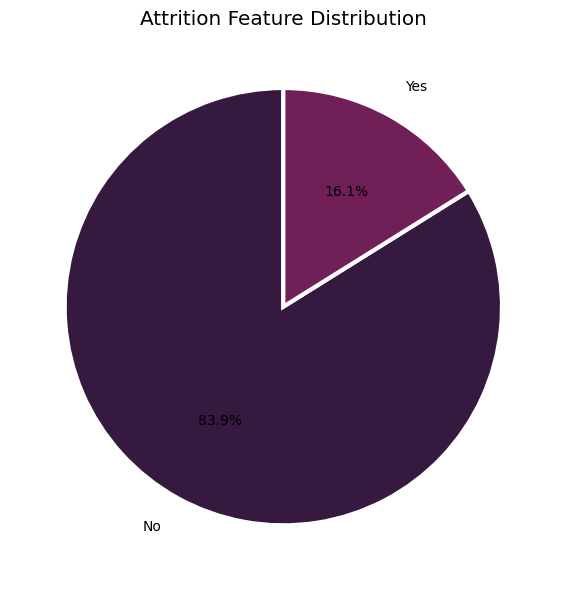

In [54]:
# Group the Attrition_Yes feature and find the count of each value. 
attrition_df = scaled_df.groupby('Attrition_Yes')[['Attrition_Yes']].count()

# Create the figure
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=attrition_df['Attrition_Yes'].values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution')
plt.tight_layout()
plt.show()

### 1. **Splitting the data**

In [55]:
scaled_df.head()

,Age,AgeBin,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,IncomeBin,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.666667,0.5,0.000000,0.25,0.333333,0.666667,0.25,1.000000,0.186804,0.333333,1.198978,0.000000,0.0,0.000000,0.000000,-0.242743,-3.0,0.000000,0.168233,0.2,-0.500000,0.4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.666667,1.0,0.250000,0.00,0.666667,0.333333,0.25,0.333333,0.039730,0.333333,-0.442507,0.857143,1.0,1.000000,0.333333,0.000000,0.0,0.666667,0.661510,0.8,0.000000,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.333333,0.5,0.035714,0.25,1.000000,0.333333,0.00,0.666667,-0.809515,0.000000,0.924704,0.285714,0.0,0.333333,0.000000,-0.385221,0.0,0.666667,-1.955449,-0.6,-0.500000,-0.6,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.333333,1.0,0.071429,0.75,1.000000,0.666667,0.00,0.666667,-0.496830,0.000000,-0.442507,0.000000,0.0,0.666667,0.000000,-0.242743,0.0,0.666667,0.442507,0.8,0.500000,-0.6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.333333,0.5,0.035714,0.00,0.000000,0.666667,0.00,0.333333,-0.330593,0.333333,1.313964,0.071429,0.0,1.000000,0.333333,-0.546748,0.0,0.666667,-0.756471,-0.2,0.292481,-0.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
# Isolate the dependent and the independent variables
X = scaled_df.drop(columns='Attrition_Yes')
y = scaled_df['Attrition_Yes']

# Split the variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE resampling to imbalanced dataset
sr = ADASYN(random_state=42)
X_resampled, y_resampled = sr.fit_resample(X_train, y_train)

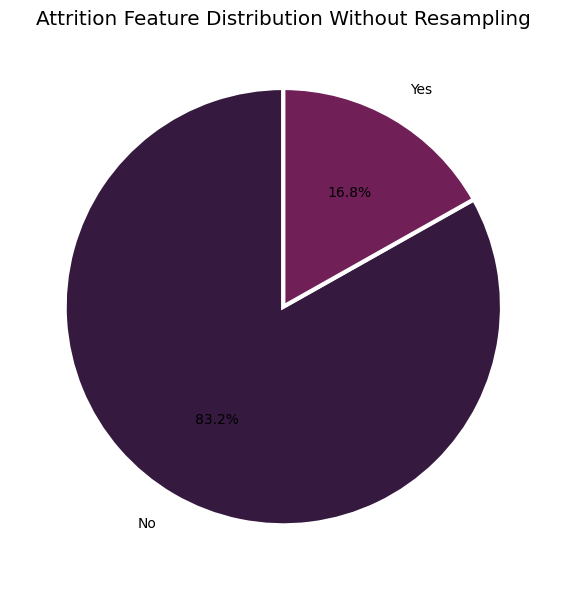

In [57]:
# Visualize data distribution without resampling
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=y_train.value_counts().values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution Without Resampling')
plt.tight_layout()
plt.show()

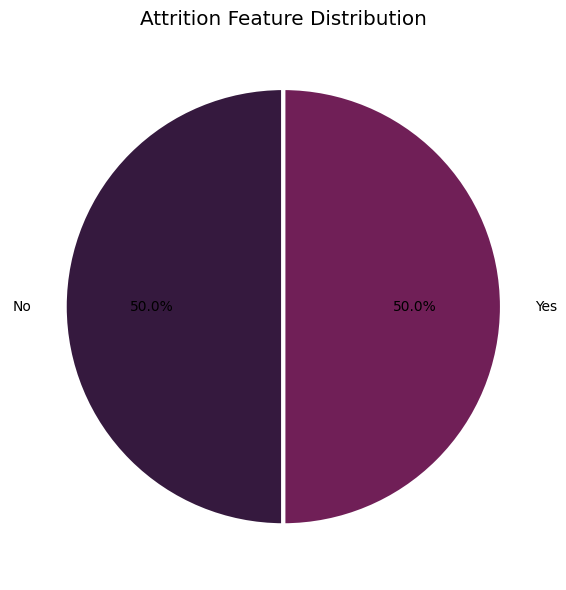

In [58]:
# Visualzie data distribution with resampling
plt.figure(figsize=(6, 6))

# Create a pieplot
plt.pie(
    x=y_resampled.value_counts().values,
    labels=['No', 'Yes'],
    startangle=90,
    labeldistance=1.15,
    autopct='%1.1f%%',
    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
)
plt.title('Attrition Feature Distribution')
plt.tight_layout()
plt.show()

### 2. **Model Selection**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [60]:
def modelPredict(
        model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                     xgb.XGBClassifier],
        X_train: Optional[pd.DataFrame]=X_train, 
        y_train: Optional[pd.DataFrame]=y_train,
        X_test: Optional[pd.DataFrame]=X_test,
        model_return: Optional[bool]=False
) ->np.ndarray:
    """
    Trains a model and makes predictions.

    Parameters:
        - model: A machine learning model (either LogisticRegression or RandomForestClassifier).
        - X_train: Training feature data.
        - y_train: Training labels.
        - X_test: Test feature data for prediction.

    Returns:
        - y_pred: Predicted labels for the test data, to be compared to known test data.
    """
    # Fit the model with training data
    model.fit(X_train, y_train)

    # Make predictions with the fitted model
    y_pred = model.predict(X_test)

    if model_return == True:
        return model, y_pred
    else:
        return y_pred


In [61]:
def modelEvaluation(y_predict: np.ndarray) -> None:
    """
    Evaluates the performance of a classification model by plotting a confusion matrix heatmap 
    and printing a classification report.

    Args:
        y_predict :
            - The predicted labels output by the model.

    Returns:
        None
    """
    # Generate the confusion matrix comparing actual and predicted labels
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(6, 4))
    
    # Plot the confusion matrix using Seaborn with annotations
    sns.heatmap(conf_matrix, linewidths=0.5, annot=True, fmt=".0f", annot_kws={"size": 10}, cbar=None)
    
    # Generate a classification report showing precision, recall, f1-score, and support
    class_report_log_reg = classification_report(y_test, y_predict)
    
    # Print the classification report
    print(class_report_log_reg)

    # Visualize the heatmap
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predict')
    plt.tight_layout()
    plt.show()


In [62]:
# Instantiate the models to be used
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

#### 2.1 **Logistic Regression**

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       255
         1.0       0.34      0.62      0.44        39

    accuracy                           0.79       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.85      0.79      0.81       294



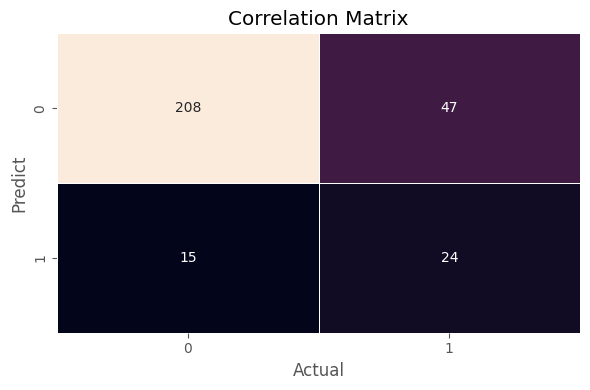

In [63]:
# Predict values using models 
y_predict_log = modelPredict(log_reg, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_log)

##### 2.1.2 **Hyperparameter Tuning**

In [64]:
def hyperParameterTuning(model: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier],
                         param_grid: dict[str, Union[list, np.ndarray]],
                         X: Optional[pd.DataFrame]=X_resampled,
                         y: Optional[pd.DataFrame]=y_resampled):
    """
    Performs hyperparameter tuning using GridSearchCV for a given model and parameter grid.

    Args:
        - model (Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier]): 
            The machine learning model to be tuned. It can be an instance of LogisticRegression, 
            RandomForestClassifier, or GradientBoostingClassifier.
        
        - param_grid (dict[str, Union[list, np.ndarray]]): 
            The hyperparameters to search over. Keys are parameter names, and values are lists or arrays 
            of parameter values to test.
        
        - X (Optional[pd.DataFrame]): 
            The training feature data. If not provided, defaults to X_train
        
        - y (Optional[pd.DataFrame]): 
            The target data. If not provided, defaults to y_train

    Returns:
        - Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier]: 
            The model with the best hyperparameters found during the search.
    """
    # Instantiate gridsearch
    clf = GridSearchCV(model, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1, refit=True)
    # Fit the model
    best_clf = clf.fit(X, y)

    # Best parameters from GridSearch
    print("Best parameters found: ", best_clf.best_params_)

    return best_clf

In [65]:
# Store the parameter grid for log_reg model
lr_param_grid = {
    'penalty': ['l2'],
    'max_iter': [50, 100, 200],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

log_hyp_model = hyperParameterTuning(log_reg, lr_param_grid)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters found:  {'C': 1, 'max_iter': 100, 'penalty': 'l2'}


              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87       255
         1.0       0.34      0.62      0.44        39

    accuracy                           0.79       294
   macro avg       0.64      0.72      0.65       294
weighted avg       0.85      0.79      0.81       294



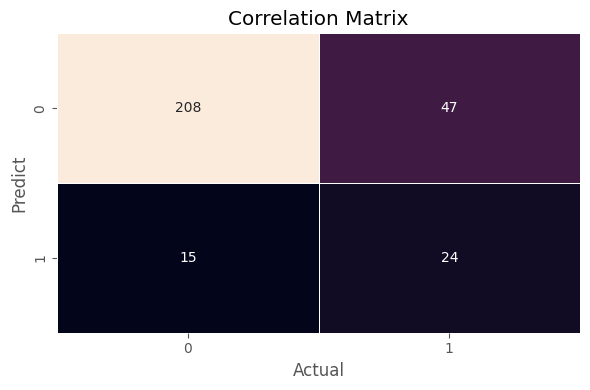

In [66]:
log_hyp_predict = log_hyp_model.predict(X_test)
modelEvaluation(log_hyp_predict)

#### 2.2 **RandomForestClassifier**

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       255
         1.0       0.54      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.71      0.58      0.60       294
weighted avg       0.84      0.87      0.84       294



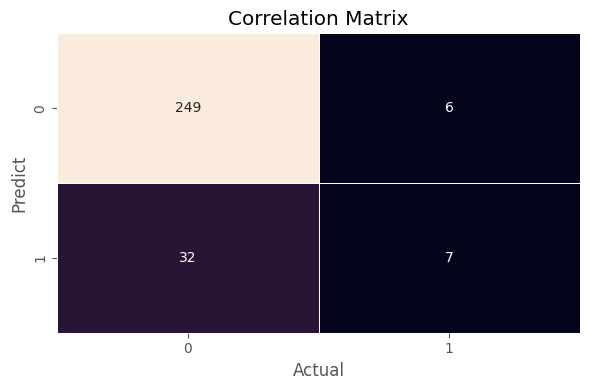

In [67]:
# Fit the model
y_predict_rfc = modelPredict(rf_clf, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_rfc)

##### 2.2.2 **Hyperparameter Tuning**

In [68]:
# Store the parameter grid for log_reg model
rfc_param_grid = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4]
}


rfc_hyp_model = hyperParameterTuning(rf_clf, rfc_param_grid)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       255
         1.0       0.58      0.18      0.27        39

    accuracy                           0.87       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.85      0.87      0.84       294



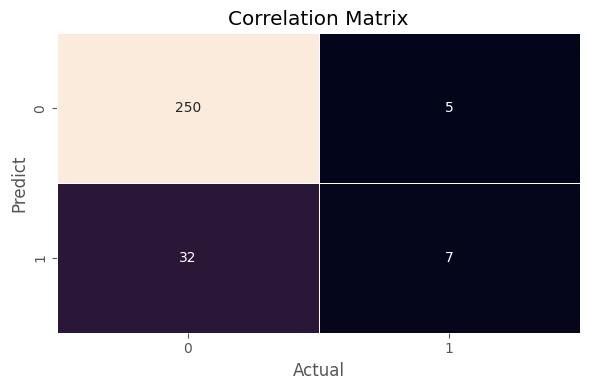

In [69]:
rfc_hyp_predict = rfc_hyp_model.predict(X_test)
modelEvaluation(rfc_hyp_predict)

#### 2.3 **GradientBoostingClassifier**

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       255
         1.0       0.63      0.44      0.52        39

    accuracy                           0.89       294
   macro avg       0.77      0.70      0.73       294
weighted avg       0.88      0.89      0.88       294



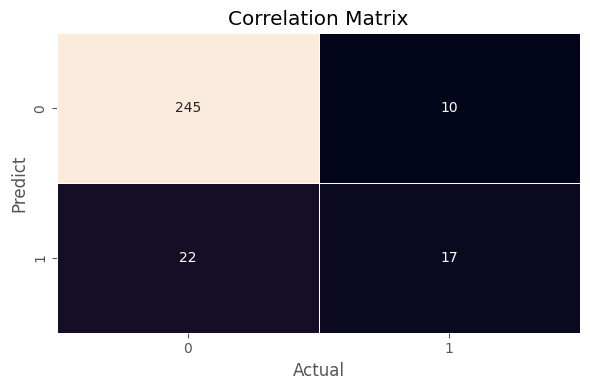

In [70]:
# Predict values using models 
y_predict_gbc = modelPredict(gb_clf, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_gbc)

##### 2.3.2 **Hyperparameter Tuning**

In [71]:
# Store the parameter grid for log_reg model
gbc_param_grid = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.0001, 0.001, 0.01,],
    'n_estimators': [30, 50, 100],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [3, 5, 7, 9, None],
    'max_features': [None, 'sqrt', 'log2'],
}

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


c:\Users\Lenovo S145\Downloads\hr attrition\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'criterion': 'friedman_mse', 'learning_rate': 0.001, 'loss': 'exponential', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       255
         1.0       0.69      0.23      0.35        39

    accuracy                           0.88       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.87      0.88      0.86       294



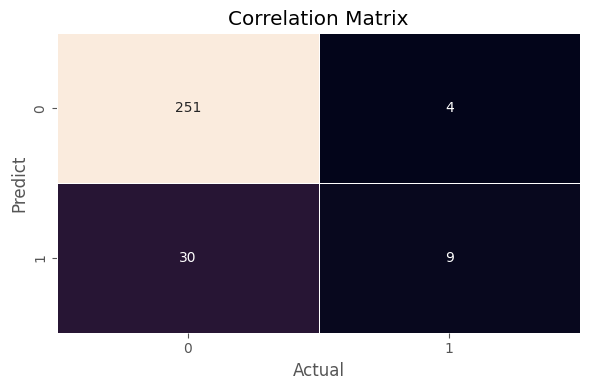

In [72]:
gbc_hyp_model = hyperParameterTuning(gb_clf, gbc_param_grid)
gbc_hyp_predict = gbc_hyp_model.predict(X_test)
modelEvaluation(gbc_hyp_predict)

#### 2.4 **XGBoost**

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       255
         1.0       0.59      0.41      0.48        39

    accuracy                           0.88       294
   macro avg       0.75      0.68      0.71       294
weighted avg       0.87      0.88      0.88       294



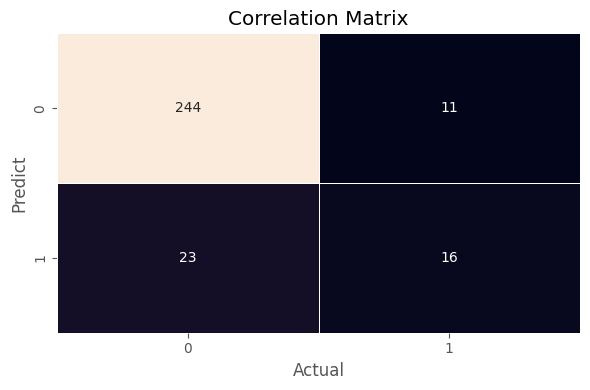

In [73]:
# Predict values using models 
y_predict_xgb = modelPredict(xgb_clf, X_train=X_resampled, y_train=y_resampled)
# Evaluate predictions
modelEvaluation(y_predict_xgb)

##### 2.4.2 **Hyperparameter Tuning**

In [74]:
# Store the parameter grid for log_reg model
xgb_param_grid = {
    'n_estimators': [800, 1000, None],
    'learning_rate': [0.0001, 0.001, 0.01],
    'max_depth': [10, 50, 100, None],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.5, 0.7,],
    'gamma': [0.1, 0.15, 0.2]
}

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters found:  {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.001, 'max_depth': 50, 'n_estimators': 1000, 'subsample': 0.8}
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       255
         1.0       0.53      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.71      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294



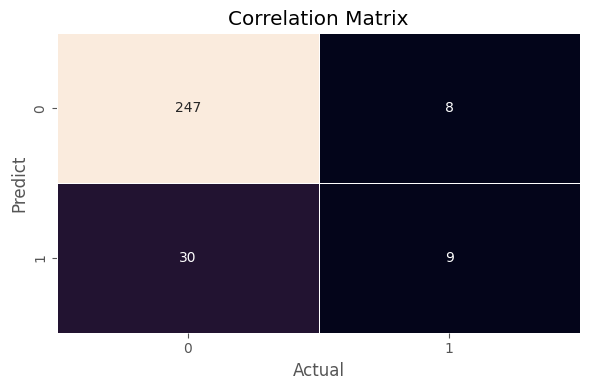

In [75]:
xgb_hyp_model = hyperParameterTuning(xgb_clf, xgb_param_grid)
xgb_hyp_predict = xgb_hyp_model.predict(X_test)
modelEvaluation(xgb_hyp_predict)

#### 2.2 **Model Evaluation**

In [76]:
def modelScoresCompare(models: Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
                                     xgb.XGBClassifier],
                       model_names: list,
                       X_train: Optional[pd.DataFrame]=X_train,
                       X_test: Optional[pd.DataFrame]=X_test,
                       y_train: Optional[pd.DataFrame]=y_train,
                       y_test: Optional[pd.DataFrame]=y_test,
    ) -> pd.DataFrame:
    """
    Compare the training and test scores of multiple classification models and return a dataframe
    with the results, including the percentage difference between the train and test scores.
    
    Args:
        models : Union[LogisticRegression, RandomForestClassifier, GradientBoostingClassifier,
        xgb.XGBClassifier].
            - A list of trained classification models to compare.
            
        model_names : list.
            - A list of strings representing the names of the models 
            (must correspond to the order of the models).

        X_train : Optional[pd.DataFrame].
            - The feature matrix used for training the models. Default is X_train.

        X_test : Optional[pd.DataFrame].
            - The feature matrix used for testing the models. Default is X_test.

        y_train : Optional[pd.DataFrame]
            - The target vector used for training the models. Default is y_train.

        y_test : Optional[pd.DataFrame]
            - The target vector used for testing the models. Default is y_test.

    Returns:
        pd.DataFrame.
            A dataframe with the train scores, test scores, and the percentage difference
            between test and train scores for each model.
    """
    # Use list comprehension to find the test scores for the training and test samples
    train_scores = [model.score(X_train, y_train) for model in models]
    test_scores = [model.score(X_test, y_test) for model in models]

    # Create a dataframe 
    data = {
        'TrainScores': train_scores,
        'TestScores': test_scores
    }
    model_scores_df = pd.DataFrame(data, index=model_names)
    model_scores_df['PercentageDifference'] = model_scores_df['TestScores'] - model_scores_df['TrainScores']

    # Convert the values to a percentage 
    model_scores_df = model_scores_df.apply(lambda x: round(x * 100, 2))

    return model_scores_df

In [77]:
def modelFitEvaluation(dataframe: pd.DataFrame) -> np.ndarray: 
    """
    Classifies models into 'Good fit', 'Overfit', or 'Underfitted' based on 
    training and test scores, as well as the percentage difference between them.

    Args:
        dataframe : pandas.DataFrame
            A dataframe containing the following columns:
            - 'TrainScores': Model scores on the training set.
            - 'TestScores': Model scores on the test set.
            - 'PercentageDifference': The percentage difference between 'TrainScores' and 'TestScores'.
    
    Returns:
    numpy.ndarray
        An array of classifications for each row in 'dataframe', where each entry is either:
        - 'Good fit': When both training and test scores are high (above 70%) 
        and the percentage difference is <= 10%.
        - 'Overfit': When both training and test scores are high, but the percentage difference is > 10%.
        - 'Underfitted': When either training or test scores are low (<= 70%).
    """
    # Masks for good fit and overfitting and underfitting
    good_fit_mask = (
        ((dataframe['TrainScores'] > 70) & (dataframe['TestScores'] > 70)) & 
        (np.abs(dataframe['PercentageDifference']) <= 10)
    )
    overfit_mask = (
        ((dataframe['TrainScores'] > 70) & (dataframe['TestScores'] > 70)) & 
        (np.abs(dataframe['PercentageDifference']) > 10)
    )
    underfit_mask = (
        ((dataframe['TrainScores'] <= 70) | (dataframe['TestScores'] <= 70))
    )

    # Applying the condition to assign labels
    model_evaluation = np.where(good_fit_mask, 'Good fit',
                                np.where(overfit_mask, 'Overfit',
                                         np.where(underfit_mask, 'Underfitted', 'Unknown')))
    return model_evaluation

In [78]:
# List the models used 
models = [log_reg, rf_clf, gb_clf, xgb_clf, log_hyp_model, rfc_hyp_model, gbc_hyp_model, xgb_hyp_model]

# Store the name of the models used
model_names  = ['Logistic Regression', 'Random Forest Classifier',
                'Gradient Boosting Classifier', 'XGBoosting Classifier', 
                'Logistic Regression (tuned)', 'Random Forest Classifier (tuned)',
                'Gradient Boosting Classifier (tuned)', 'XGBoosting Classifier (tuned)',]
 
model_scores_df = modelScoresCompare(models, model_names, X_train=X_resampled, y_train=y_resampled)
model_scores_df['ModelEvaluation'] = modelFitEvaluation(model_scores_df)
model_scores_df

,TrainScores,TestScores,PercentageDifference,ModelEvaluation
Logistic Regression,83.13,78.91,-4.22,Good fit
Random Forest Classifier,100.00,87.07,-12.93,Overfit
Gradient Boosting Classifier,96.57,89.12,-7.46,Good fit
XGBoosting Classifier,100.00,88.44,-11.56,Overfit
Logistic Regression (tuned),83.13,78.91,-4.22,Good fit
Random Forest Classifier (tuned),100.00,87.41,-12.59,Overfit
Gradient Boosting Classifier (tuned),100.00,88.44,-11.56,Overfit
XGBoosting Classifier (tuned),98.11,87.07,-11.03,Overfit


In [83]:
best_model_name = model_scores_df[model_scores_df['ModelEvaluation'] == 'Good fit']['TestScores'].idxmax()
print(f'Model to train: {best_model_name}')

Model to train: Gradient Boosting Classifier


### 3.

In [84]:
# Create a dictionary of the models and the model_names
model_dct = dict(zip(model_names, models))
best_model = model_dct.get(best_model_name)

In [85]:
# Calculate feature importance by sorting coefficients by absolute value
feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names})

feature_importance['ImportanceValues'] = best_model.feature_importances_
feature_importance = feature_importance.sort_values(by='ImportanceValues', ascending=False)

print('Feature Importance (Most to least):\n', feature_importance)

Feature Importance (Most to least):
                               Feature  ImportanceValues
41                       OverTime_Yes          0.297311
15                   StockOptionLevel          0.108612
2                      BusinessTravel          0.078351
10                          IncomeBin          0.068634
40               MaritalStatus_Single          0.046890
6                      JobInvolvement          0.046529
18                    WorkLifeBalance          0.038626
8                     JobSatisfaction          0.036332
5             EnvironmentSatisfaction          0.035009
22               YearsWithCurrManager          0.032649
19                     YearsAtCompany          0.025519
16                  TotalWorkingYears          0.016371
0                                 Age          0.016031
30                        Gender_Male          0.012486
7                            JobLevel          0.011894
11                 NumCompaniesWorked          0.011784
3          

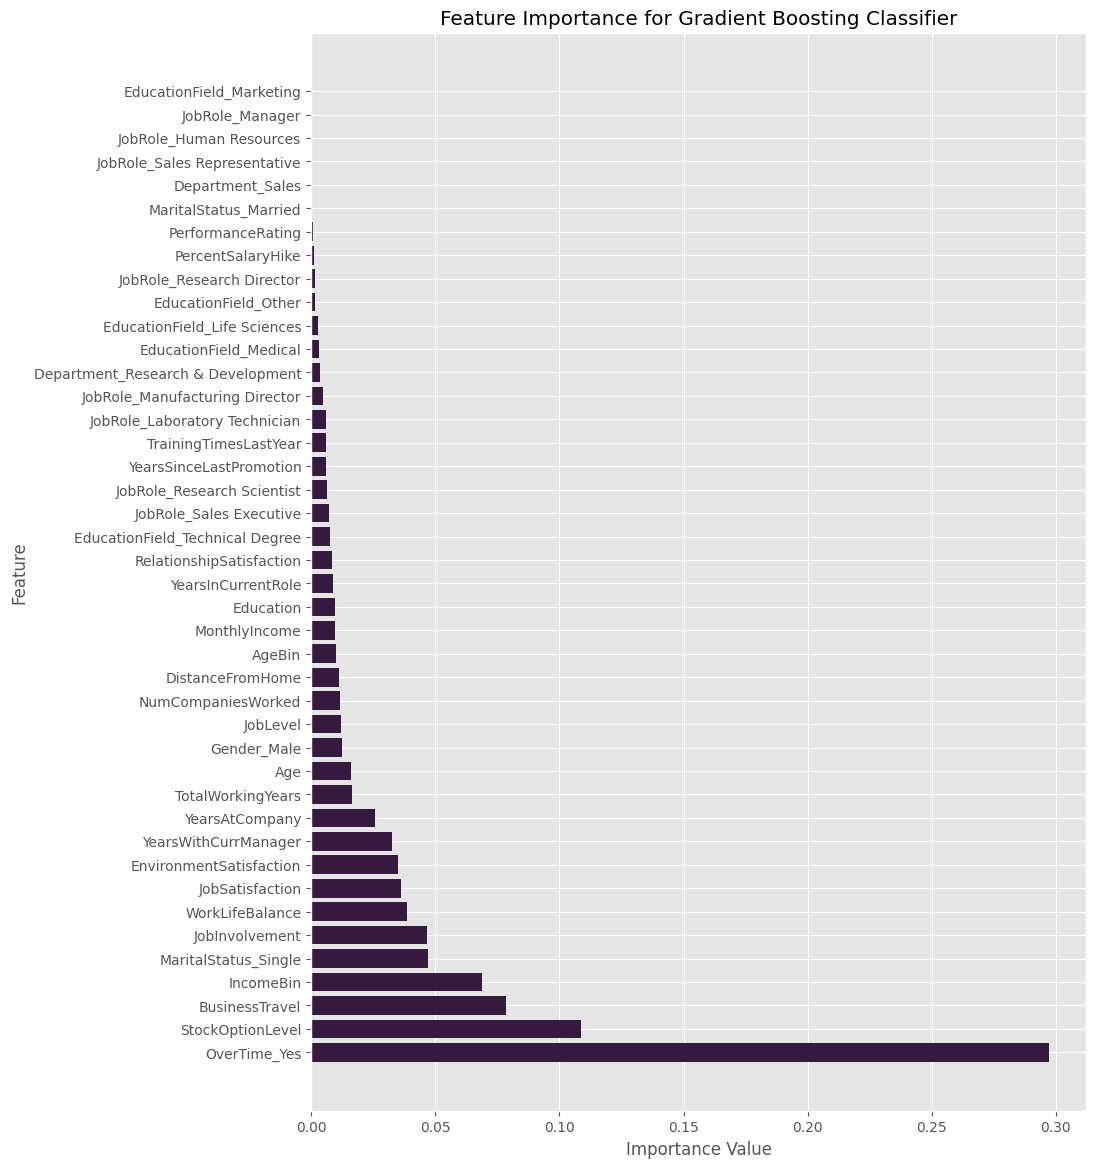

In [91]:
# Visualize feature importance using the feature coefficients
plt.figure(figsize=(10, 14))
plt.barh(feature_importance['Feature'], feature_importance['ImportanceValues'])
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title(f'Feature Importance for {best_model_name}')
plt.grid(True)
plt.show()

## **Save Model**
___

In [92]:
#  Import pickle 
import pickle 

# Use context manager to write pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       255
         1.0       0.63      0.44      0.52        39

    accuracy                           0.89       294
   macro avg       0.77      0.70      0.73       294
weighted avg       0.88      0.89      0.88       294



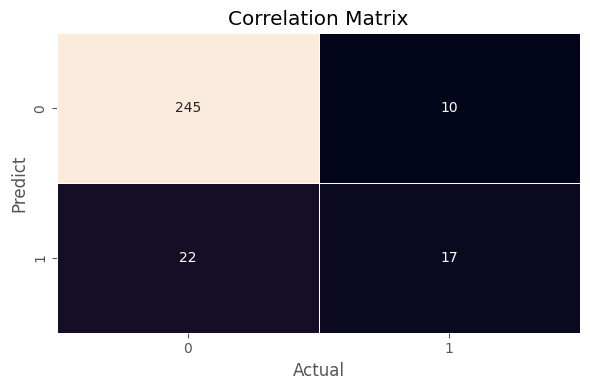

In [93]:
# Load the saved model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

#  Make predictions with X_test
y_pred_pickle = loaded_model.predict(X_test)

# Use classification report to return key evaluation metrics
modelEvaluation(y_pred_pickle)